# Proyek Analisis Data: Brazilian E-Commerce
- **Nama:** Muhammad Aliza Mudrikah
- **Email:** alzzamuhammad77@gmail.com
- **ID Dicoding:** [Input Username]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk apakah yang paling banyak dan paling sedikit terjual?
- Pertanyaan 2 : Kota manakah yang paling banyak menyumbang pembelian produk?
- Pertanyaan 3 : Apa tipe pembayaran yang terbanyak dipakai oleh pelanggan? 
- Pertanyaan 4 : Produk apakah yang memiliki rating tertinggi dan terendah?

Pertanyaan-pertanyaan ini dapat menentukan strategi bisnis yang sesuai untuk produk yang paling laku, menyesuaikan strategi promo di berbagai daerah, menentukan promo berdasarkan tipe pembayaran, dan mengevaluasi produk berdasarkan rating.

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [3]:
# Data Customer
customers_df = pd.read_csv('./Data/customers_dataset.csv')
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
# Data Orders
orders_df = pd.read_csv('./Data/orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [5]:
# Geolocation Dataset
geolocation_df = pd.read_csv('./Data/geolocation_dataset.csv')
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [6]:
# Order items
order_items_df = pd.read_csv('./Data/order_items_dataset.csv')
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [7]:
# Order Payments Dataset
order_payments_df = pd.read_csv('./Data/order_payments_dataset.csv')
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [8]:
# Product Category name translation
product_category_name_translation_df = pd.read_csv('./Data/product_category_name_translation.csv')
product_category_name_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [9]:
# Order review Dataset
order_reviews_df = pd.read_csv('./Data/order_reviews_dataset.csv')
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [10]:
products_df = pd.read_csv('./Data/products_dataset.csv')
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Insight:**
- Data yang didapatkan dalam bentuk terpisah antara data customer, data orders, dan data lainnya seperti tipe pembayaran dan asal daerah (geolokasi)
- Data yang terpisah tersebut perlu digabungkan setelah proses penilaian dan cleaning

### Assessing Data

#### Menilai Data Customer

In [11]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
customers_df.duplicated().sum()

0

#### Menilai Data Order

In [15]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [16]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [17]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [18]:
orders_df.duplicated().sum()

0

In [19]:
orders_df['order_approved_at'][orders_df['order_approved_at'].isna()]

1130     NaN
1801     NaN
1868     NaN
2029     NaN
2161     NaN
        ... 
97696    NaN
98415    NaN
98909    NaN
99283    NaN
99347    NaN
Name: order_approved_at, Length: 160, dtype: object

In [20]:
orders_df['order_delivered_carrier_date'][orders_df['order_delivered_carrier_date'].isna()] 

6        NaN
103      NaN
128      NaN
266      NaN
324      NaN
        ... 
99283    NaN
99313    NaN
99347    NaN
99348    NaN
99415    NaN
Name: order_delivered_carrier_date, Length: 1783, dtype: object

In [21]:
orders_df['order_delivered_customer_date'][orders_df['order_delivered_customer_date'].isna()] 

6        NaN
44       NaN
103      NaN
128      NaN
154      NaN
        ... 
99283    NaN
99313    NaN
99347    NaN
99348    NaN
99415    NaN
Name: order_delivered_customer_date, Length: 2965, dtype: object

#### Menilai Data Order Items

In [22]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [23]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [24]:
order_items_df.duplicated().sum()

0

#### Menilai Data Geolocation

In [25]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [26]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [27]:
geolocation_df.duplicated().sum()

261831

#### Menilai Data Order Payments

In [28]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [29]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [30]:
order_payments_df.duplicated().sum()

0

#### Menilai Data Order Review

In [31]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [32]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [33]:
order_reviews_df.duplicated().sum()

0

#### Menilai Data Products

In [34]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [35]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [36]:
print(products_df['product_category_name'][products_df['product_category_name'].isna()])

105      NaN
128      NaN
145      NaN
154      NaN
197      NaN
        ... 
32515    NaN
32589    NaN
32616    NaN
32772    NaN
32852    NaN
Name: product_category_name, Length: 610, dtype: object


#### Menilai Product Category Name Translation

In [37]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [38]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [39]:
product_category_name_translation_df.duplicated().sum()

0

**Insight:**
- Data orders memiliki missing values yang cukup banyak. Karena waktunya berupa tanggal dan data yang tersisa relatif jauh lebih banyak, maka dapat diabaikan/dibuang.
- Data order review memiliki missing value pada komentar. Jumlahnya sangat banyak sehingga dapat menyebabkan data tersisa menjadi sedikit. Oleh karena itu, pada analisis ini, review hanya melibatkan rating atau review score.
- Data Geolokasi memiliki banyak duplikasi. Akan tetapi, dapat diabaikan/dibuang karena jumlahnya relatif lebih sedikit dibandingkan data yang tersisa.
- Data products memiliki banyak missing value. Akan tetapi, karena ia tidak terkait dengan orders id sebagai data utama, ia dapat dibuang.

### Cleaning Data

#### Cleaning Data Orders

In [40]:
orders_df.dropna(inplace=True)
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [41]:
# Drop data with cancelled status
orders_df = orders_df[orders_df['order_status'] != 'canceled']

#### Picking Data Order Reviews (Review Score Only)

In [42]:
review_score_df = order_reviews_df[['review_id', 'order_id', 'review_score']]
review_score_df

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5
...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4


#### Cleaning Data Geolocation

In [43]:
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.duplicated().sum()

0

#### Cleaning Products

In [44]:
products_df.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [45]:
products_df.dropna(inplace=True)
products_df.isna().sum()
products_df.drop(['product_name_lenght','product_description_lenght', 'product_photos_qty', 'product_weight_g','product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1, inplace=True)

In [46]:
products_df

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


**Insight:**
- Cleaning pada data order dilakukan dengan menghilangkan semua baris yang memiliki missing value.
- Cleaning pada data geolocation dilakukan dengan menghilangkan semua duplikasi.
- Cleaning pada data product dilakukan dengan menghilangkan semua baris yang memiliki missing value dan hanya mengambil nama product category.
- Cleaning pada data review dilakukan dengan drop kolom judul komentar dan pesan komentar.

## Exploratory Data Analysis (EDA)

In [47]:
# Merge Data Customers dan Data Orders
customers_orders_df = pd.merge(customers_df, orders_df, on='customer_id')
customers_orders_df['order_purchase_timestamp'] = pd.to_datetime(customers_orders_df['order_purchase_timestamp'])
customers_orders_df['order_purchase_date'] = customers_orders_df['order_purchase_timestamp'].dt.date 
order_customer_items_df = pd.merge(customers_orders_df, order_items_df, on='order_id')
order_customer_items_products_df = pd.merge(order_customer_items_df, products_df, on='product_id')
order_customer_items_products_df = pd.merge(order_customer_items_products_df, product_category_name_translation_df, on='product_category_name')
order_customer_items_products_df.drop(['product_category_name'], axis=1, inplace=True)
orders_payments_df = pd.merge(orders_df, order_payments_df, on='order_id')
orders_review_df = pd.merge(order_customer_items_products_df, review_score_df, on='order_id')

In [48]:
all_df = pd.merge(pd.merge(order_customer_items_products_df, review_score_df, on='order_id'), order_payments_df, on='order_id')
all_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,shipping_limit_date,price,freight_value,product_category_name_english,review_id,review_score,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-22 15:22:12,124.99,21.88,office_furniture,88b8b52d46df026a9d1ad2136a59b30b,4,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-01-18 20:58:32,289.00,46.48,housewares,02fc48a9efa3e3d0f1a8ea26507eeec3,5,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-05 16:19:10,139.94,17.79,office_furniture,5ad6695d76ee186dc473c42706984d87,5,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-03-27 16:31:16,149.94,23.36,office_furniture,059a801bb31f6aab2266e672cab87bc5,5,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-07-31 10:10:09,230.00,22.25,home_confort,8490879d58d6c5d7773f2739a03f089a,5,1,credit_card,8,252.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113181,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2018-04-12 16:08:45,74.90,13.88,books_general_interest,36e2cdbaa9f639b57c53b37ac798fee8,4,1,credit_card,6,88.78
113182,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,2018-04-10 08:35:12,114.90,14.16,sports_leisure,b273b431c3aedb4eed18643309652940,5,1,credit_card,3,129.06
113183,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,2018-04-12 20:30:03,37.00,19.04,health_beauty,fa4f16891e6b2edd1354668d07f5648b,1,1,credit_card,5,56.04
113184,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,2017-11-09 21:15:51,689.00,22.07,watches_gifts,0bcdc9e450ea500811a8d39ee993cd47,5,1,credit_card,2,711.07


### Explore Data Customers dan Data Orders

In [49]:
all_df.groupby(by='customer_city').agg({
    'customer_id': 'count'
}).sort_values(by='customer_id')

,customer_id
customer_city,
lagoa real,1
jurema,1
jucas,1
joselandia,1
jose da penha,1
...,...
curitiba,1767
brasilia,2382
belo horizonte,3140


In [50]:
customer_city_df = all_df.groupby(by='customer_city').agg({
    'customer_id': 'count'
}).sort_values(by='customer_id')

### Ekplorasi Data Order, Customer, Items, dan Products

In [51]:
all_df.groupby(by='product_category_name_english').agg({
    'order_id': 'count'
}).sort_values(by='order_id', ascending=False)

,order_id
product_category_name_english,
bed_bath_table,11684
health_beauty,9747
sports_leisure,8733
furniture_decor,8554
computers_accessories,7926
...,...
arts_and_craftmanship,24
la_cuisine,15
cds_dvds_musicals,14


In [52]:
sorted_products = all_df.groupby(by='product_category_name_english').agg({
    'order_id': 'count'
}).sort_values(by='order_id', ascending=False)

### Eksplorasi Data Payment Order

In [53]:
orders_payments_df_sorted = all_df.groupby(by='payment_type').agg({
    'order_id': 'count'
}).sort_values(by='payment_type', ascending=False)
orders_payments_df_sorted

,order_id
payment_type,
voucher,6022
debit_card,1622
credit_card,83527
boleto,22015


### Eksplorasi Data Review Order

In [54]:
all_df.groupby(by='product_category_name_english').agg({
    'review_score': 'mean'
}).sort_values(by='review_score', ascending=False)

,review_score
product_category_name_english,
fashion_childrens_clothes,5.000000
cds_dvds_musicals,4.642857
books_imported,4.525424
books_general_interest,4.501838
small_appliances_home_oven_and_coffee,4.453333
...,...
fashion_male_clothing,3.649635
home_comfort_2,3.642857
office_furniture,3.553204


In [55]:
orders_review_sorted = all_df.groupby(by='product_category_name_english').agg({
    'review_score': 'mean'
}).sort_values(by='review_score', ascending=False)

**Insight:**
- Order berasal dari berbagai kota. Terdapat sejumlah 4085 kota dari data customer. Hal ini cukup menyulitkan ketika dibuat visualisasi data secara keseluruhan. Oleh karena itu, dapat dibuat hanya sepuluh terbanyak.
- Kota yang paling banyak memesan produk adalah Sao Paulo. Di sisi lain, terdapat banyak kota yang hanya memesan satu produk, yaitu sebanyak 1139 kota.
- Sebelum mengeksplorasi data produk yang dijual, data customer, order, product, dan nama produk harus dimerge dengan memperhatikan terjemahan dari bahasa Brazil ke bahasa Inggris agar dipahami secara universal.
- Seperti halnya kota, jenis produk cukup banyak sehingga tidak mudah untuk membuat visualisasi dengan ukuran yang terbatas. Hal ini juga terjadi pada review karena review bergantung pada kategori produk.
- Untuk mengeksplorasi review score atau rating, digunakan rata-rata pada setiap kategori produk. Hal ini disebabkan tidak ada outlier pada rating score karena hanya berkisar dari 1 sampai 5

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apakah yang paling banyak dan paling sedikit terjual?

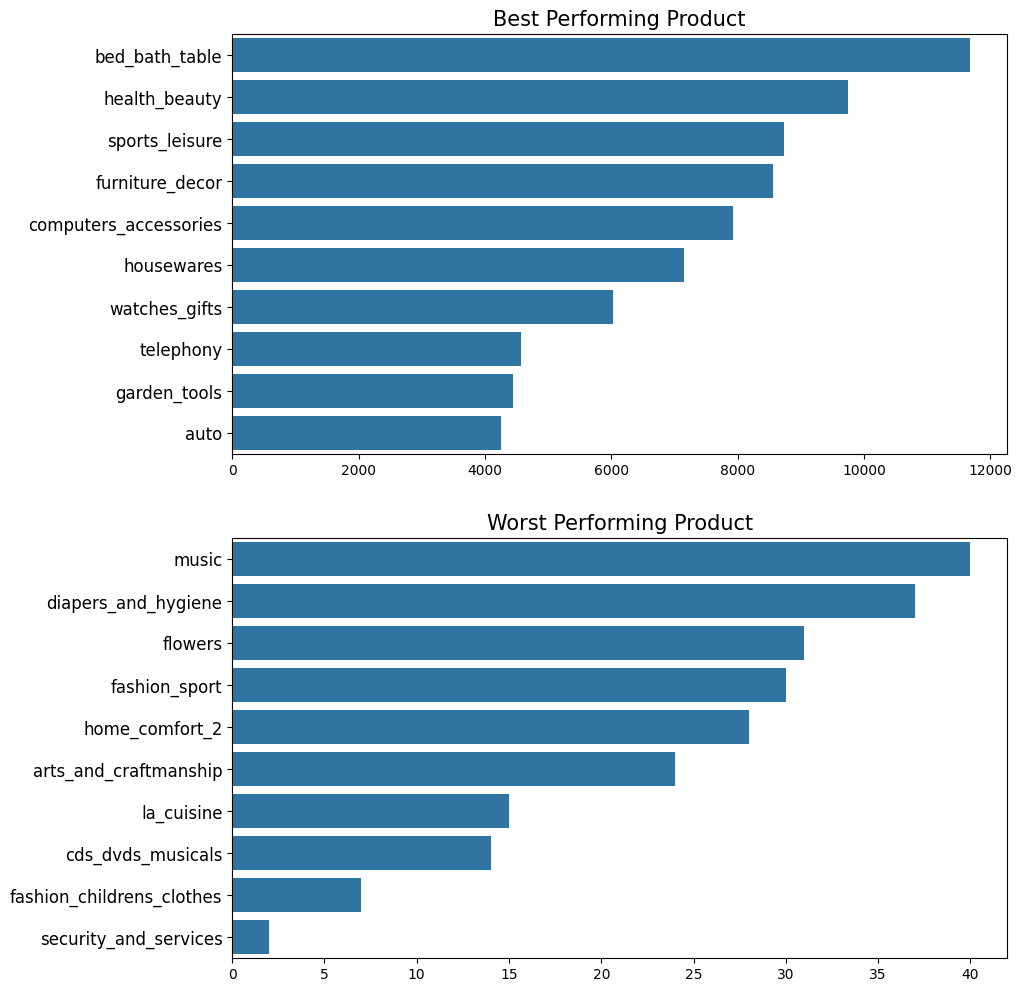

In [56]:
# Plot 10 data teratas
fig, ax = plt.subplots(2, 1, figsize=(10,12))

# Sort the bar chart from highest to lowest
sns.barplot(x='order_id', y='product_category_name_english', data=sorted_products.head(10), ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x='order_id', y='product_category_name_english', data=sorted_products.tail(10), ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis ='y', labelsize=12)

### Pertanyaan 2: Daerah manakah yang paling banyak menyumbang pembelian produk?

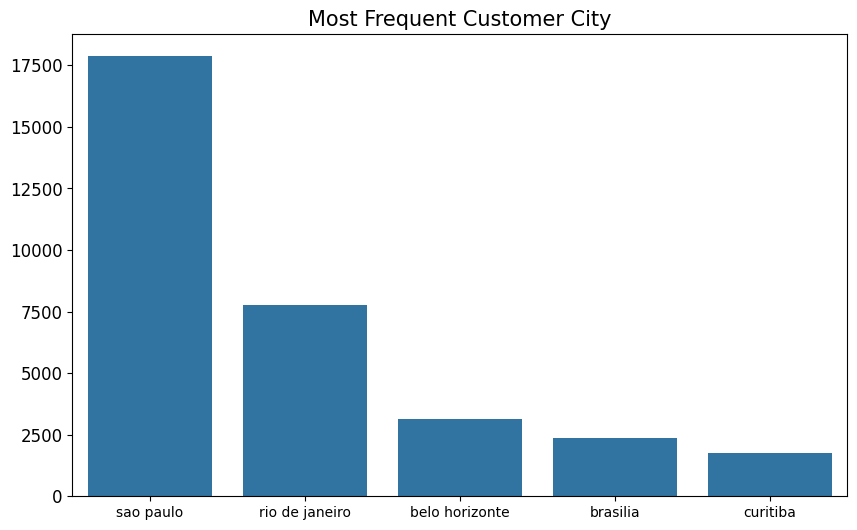

In [57]:
# Plot 10 data teratas
fig, ax = plt.subplots(figsize=(10,6))

# Sort the bar chart from highest to lowest
sns.barplot(y='customer_id', x='customer_city', data=customer_city_df.sort_values(by='customer_id', ascending=False).head(5), ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Most Frequent Customer City", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)

### Pertanyaan 3: Apa tipe pembayaran yang terbanyak dipakai oleh pelanggan? 

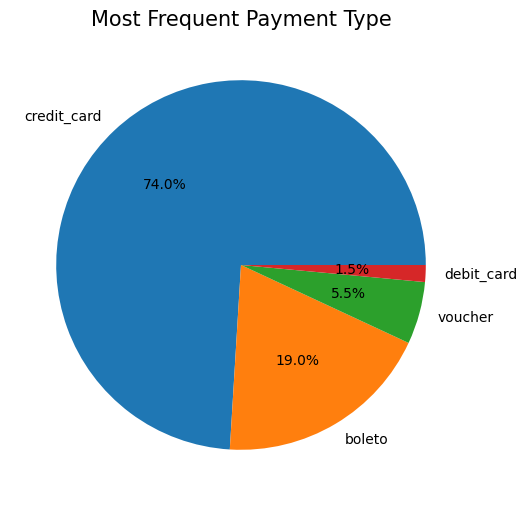

In [58]:
# Plot 10 data teratas
fig, ax = plt.subplots(figsize=(10,6))

# Sort the bar chart from highest to lowest
# Make circle chart
plt.pie(orders_payments_df['payment_type'].value_counts().values, labels=orders_payments_df['payment_type'].value_counts().index, autopct='%1.1f%%')
# sns.barplot(y='order_id', x='payment_type', data=orders_payments_df_sorted.sort_values(by='payment_type', ascending=False).head(5), ax=ax)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("Most Frequent Payment Type", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)

### Pertanyaan 4: Produk apakah yang memiliki rating tertinggi dan terendah?

C:\Users\Acer\AppData\Local\Temp\ipykernel_3688\972329962.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='product_category_name_english', x='review_score', data=orders_review_sorted.head(5), palette=colors, ax=ax[0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3688\972329962.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='product_category_name_english', x='review_score', data=orders_review_sorted.sort_values(by="review_score", ascending=True).head(5), palette=colors, ax=ax[1])


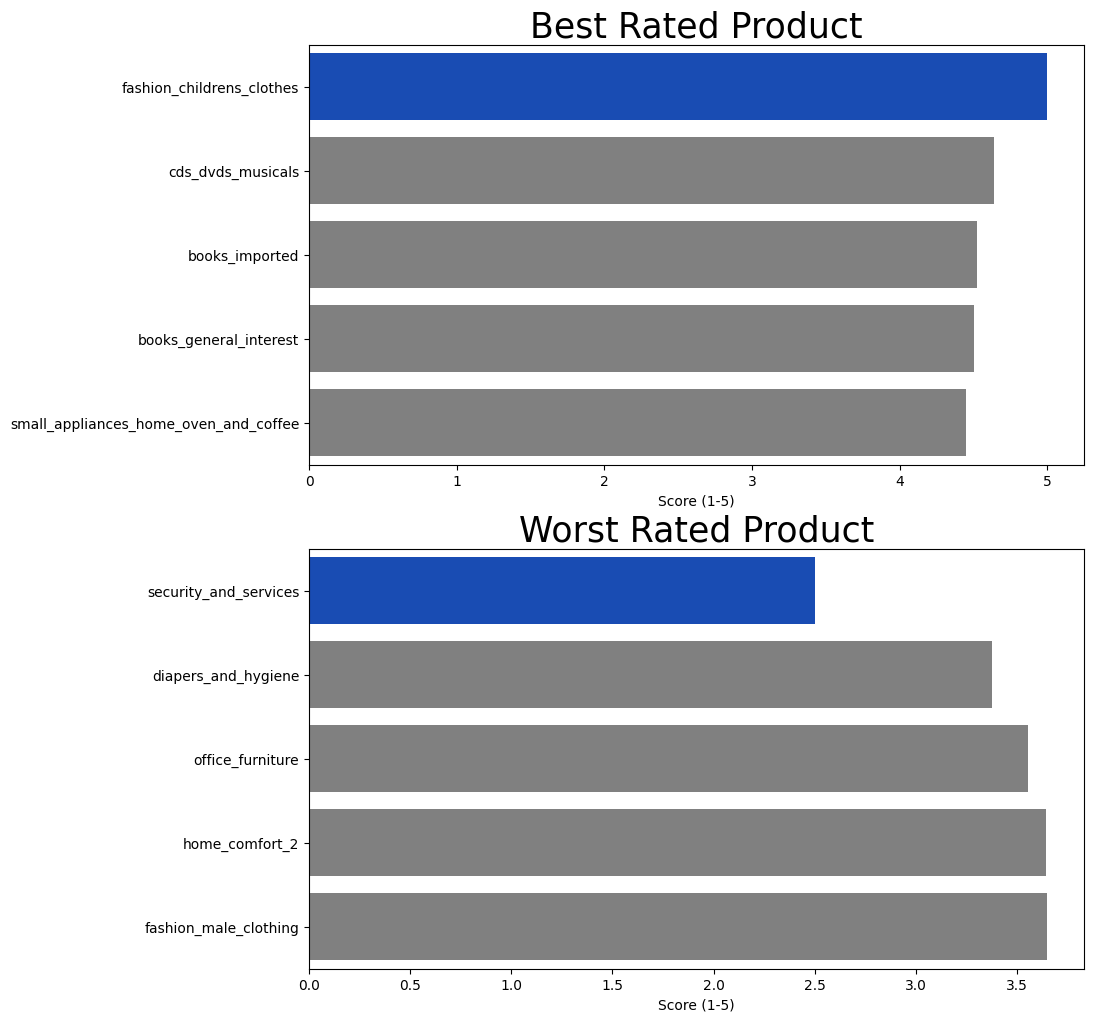

In [66]:
# Plot 10 data teratas
fig, ax = plt.subplots(2,1,figsize=(10,12))

# Sort the bar chart from highest to lowest
colors = ["#0044CC", "#808080" , "#808080", "#808080", "#808080"]
 
sns.barplot(y='product_category_name_english', x='review_score', data=orders_review_sorted.head(5), palette=colors, ax=ax[0])
ax[0].set_xlabel("Score (1-5)", fontsize=10)
ax[0].set_ylabel(None)
ax[0].set_title("Best Rated Product", loc="center", fontsize=25)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].tick_params(axis='x', labelsize=10)
# rotate x axis
 
sns.barplot(y='product_category_name_english', x='review_score', data=orders_review_sorted.sort_values(by="review_score", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_xlabel("Score (1-5)", fontsize=10)
ax[1].set_ylabel(None)
ax[1].set_title("Worst Rated Product", loc="center", fontsize=25)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].tick_params(axis='x', labelsize=10)

**Insight:**
- Plotting data teratas pada review, product, payment, dan kota asal customer menggunakan bar chart karena data yang digunakan adalah data kategori yang memiliki frekuensi. 
- Plotting data kota asal menggunakan bar chart horizontal karena data yang diambil adalah 10 kota teratas sehingga data akan lebih mudah dipahami dengan bar chart horizontal.
- Plotting data pembayaran menggunakan pie chart karena data kategori yang digunakan hanya sebanyak 4 jenis pembayaran sehingga dapat dipahami jika menggunakan pie chart.
- Plotting data rating menggunakan bar chart horizontal karena data kategori yang digunakan hanya sebanyak 5 teratas dan terbawah sehingga dapat dipahami jika menggunakan bar chart.

## Analisis Lanjutan (RFM Analysis)

### Analisis dilakukan untuk melihat pelanggan yang memiliki value tertinggi

In [61]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
recent_date = customers_orders_df["order_purchase_date"].max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,114
2,0000f46a3911fa3c0805444483337064,1,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,288


C:\Users\Acer\AppData\Local\Temp\ipykernel_3688\1358576216.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3688\1358576216.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\Acer\AppData\Local\Temp\ipykernel_3688\1358576216.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for t

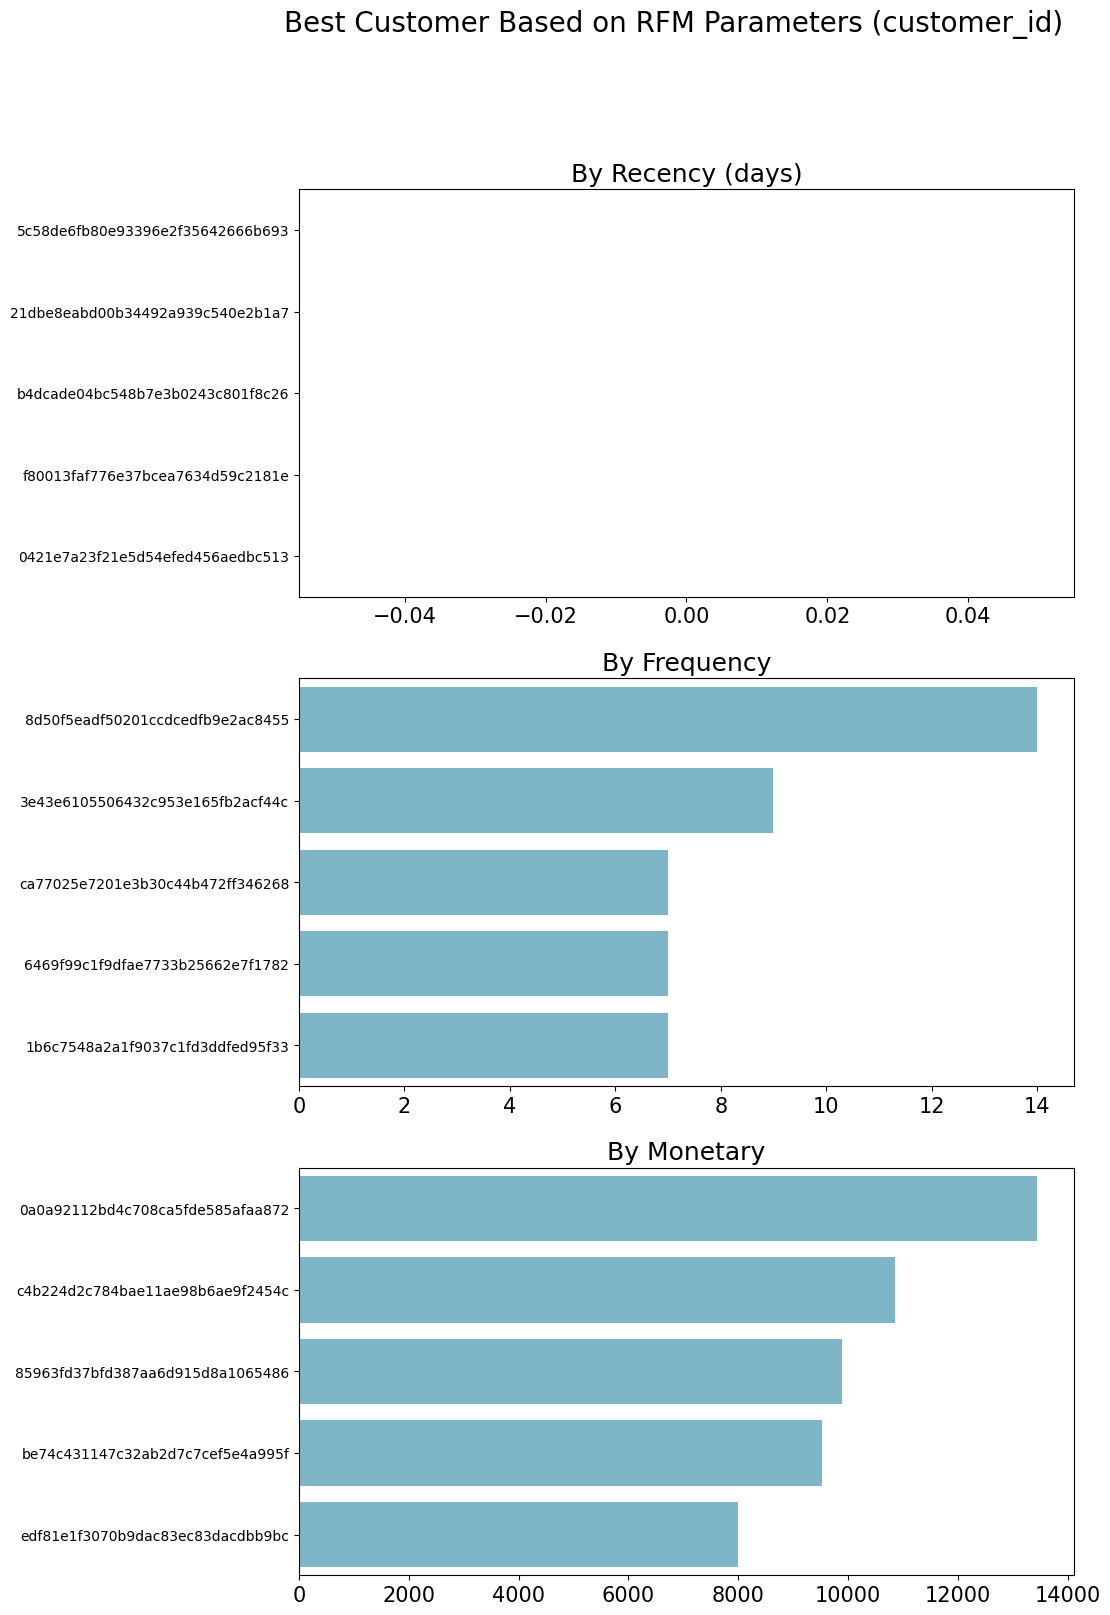

In [62]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))
 
colors = ["#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9"]

sns.barplot(x="recency", y="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(x="frequency", y="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(x="monetary", y="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**
- RFM analysis mendapatkan bahwa terdapat beberapa pelanggan yang memiliki high value dengan melakukan pembelian terbaru (berdasarkan recency), melakukan pembelian nilai terbesar (berdasarkan monetary), dan melakukan pembelian dengan frekuensi terbanyak (berdasarkan frequency)
- Plot menggunakan bar horizontal disebabkan customer_id yang cukup panjang sehingga lebih baik terlihat pada bar horizontal.

## Conclusion

- Kesimpulan Pertanyaan 1 : 
    Kategori produk yang paling banyak terjual adalah bed_bath_table (kasur, peralatan kamar mandi, dan meja), sedangkan yang paling sedikit terjual adalah kategori security and services (keamanan). Hal ini dapat menjadi evaluasi pada produk atau promosi setiap kategori produk.
- Kesimpulan Pertanyaan 2 :
    Kota yang paling banyak menyumbang pembelian produk adalah kota Sao Paulo dengan selisih yang cukup jauh dengan peringkat kedua terbanyak. Hal ini dapat menjadi bahan pertimbangan untuk memperluas jangkauan e-commerce.
- Kesimpulan Pertanyaan 3 : 
    Tipe pembayaran yang paling terbanyak dipakai adalah kartu kredit dengan selisih yang cukup jauh terhadap tipe pembayaran lainnya. Hal ini dapat menjadi pertimbangan kerjasama e-commerce dengan penyedia tipe pembayaran tersebut. 
- Kesimpulan Pertanyaan 4 :
    Produk yang memiliki rating tertinggi berdasarkan review score adalah fashion_children_clothes, sedangkan produk yang memiliki rating terendah adalah kategori security_and_services. Hal ini terlihat berhubungan dengan jawaban pertanyaan 1 bahwa kategori security_and_services memiliki jumlah penjualan yang paling sedikit. Hal ini dapat menjadi bahan evaluasi produk tersebut.
- Kesimpulan Analisis Lanjutan:
    Dengan RFM Analysis, dapat terlihat bahwa jika berdasarkan tanggal terbaru, terdapat customer yang membeli produk baru-baru ini. Selain itu, terdapat beberapa pelanggan yang merupakan high value dengan melakukan pembelian terbanyak dan dengan nilai terbanyak.

In [63]:
# Proses pengubahan all_df menjadi csv
all_df.to_csv('./Data/all_df.csv')